<a href="https://colab.research.google.com/github/kunaltyagi16/CNN-Models-Comparison/blob/main/Models%20Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


In [ ]:
import os
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D

In [ ]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  # crawls inside folders
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count
train_dir ="/content/drive/MyDrive/Colab Notebooks/dataset-small/train"
test_dir="/content/drive/MyDrive/Colab Notebooks/dataset-small/val"

In [ ]:
#train file image count
train_samples =get_files(train_dir)
#to get tags
num_classes=len(glob.glob(train_dir+"/*"))
#test file image count
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

27 Classes
947 Train images
405 Test images


In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
input_shape=(224,224,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

Found 947 images belonging to 27 classes.
Found 405 images belonging to 27 classes.


In [ ]:
def create_Base_model_from_VGG16():
    model = VGG16(
        weights = "imagenet",
        include_top=False,
        input_shape = (224,224, 3)
        )
    for layer in model.layers:
      layer.trainable = False
    return model
create_Base_model_from_VGG16().summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
def add_custom_layers():
    model = create_Base_model_from_VGG16()
    x = model.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
    # creating the final model
    final_model = tf.keras.models.Model(
        inputs = model.input,
        outputs = predictions)

    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return final_model

add_custom_layers().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:

validation_generator = train_datagen.flow_from_directory(
                       test_dir, # same directory as training data
                       target_size=(224, 224),
                       batch_size=32)

Found 405 images belonging to 27 classes.


In [ ]:
model_from_vgg16 = add_custom_layers()
history2 = model_from_vgg16.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    use_multiprocessing=False,
    shuffle=True
    )

Epoch 1/10
30/30 [==============================] - 143s 5s/step - loss: 3.1974 - accuracy: 0.2724 - val_loss: 2.3360 - val_accuracy: 0.3358 - lr: 0.0010
Epoch 2/10
30/30 [==============================] - 136s 5s/step - loss: 1.2871 - accuracy: 0.6008 - val_loss: 1.7684 - val_accuracy: 0.4568 - lr: 0.0010
Epoch 3/10
30/30 [==============================] - 132s 4s/step - loss: 0.8267 - accuracy: 0.7212 - val_loss: 1.4738 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 4/10
30/30 [==============================] - 134s 5s/step - loss: 0.6889 - accuracy: 0.7856 - val_loss: 1.3747 - val_accuracy: 0.5580 - lr: 0.0010
Epoch 5/10
30/30 [==============================] - 134s 4s/step - loss: 0.5339 - accuracy: 0.8215 - val_loss: 1.3901 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 6/10
30/30 [==============================] - 141s 5s/step - loss: 0.4828 - accuracy: 0.8384 - val_loss: 1.2240 - val_accuracy: 0.6099 - lr: 0.0010
Epoch 7/10
30/30 [==============================] - 172s 6s/step - loss: 0.3

In [ ]:
model_from_vgg16.save('/content/drive/MyDrive/Colab Notebooks/Model/VGG16.h5')


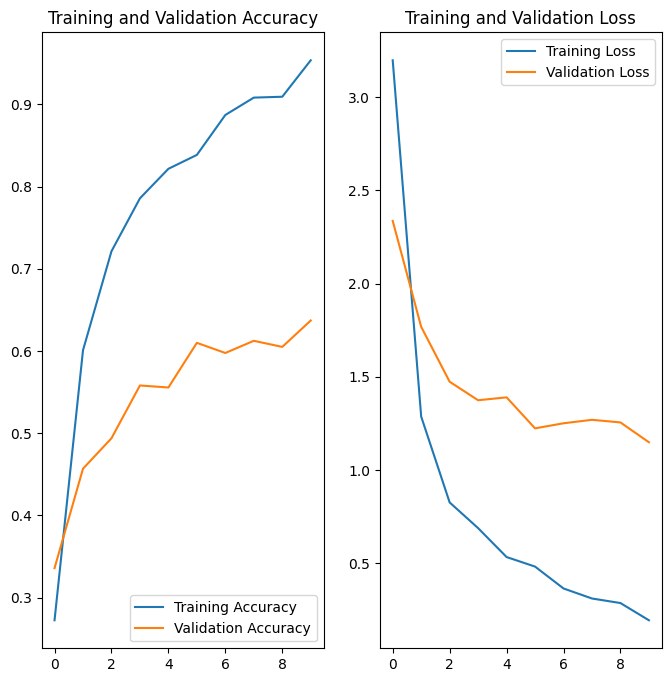

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def create_Base_model_from_VGG19():
    model_vgg19 = VGG19(
        weights = "imagenet",# control point from which model is started
        include_top=False, # to include/exclude the first 3 layers
        input_shape = (224,224, 3)) # image size
    # don't train existing weights
    for layer in model_vgg19.layers:
      layer.trainable = False
    return model_vgg19
create_Base_model_from_VGG19().summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
def add_custom_layers_vgg19():
    #Adding custom Layers
    model_vgg19 = create_Base_model_from_VGG19()
    x = model_vgg19.output
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
    # creating the final model
    final_model = tf.keras.models.Model(
        inputs = model_vgg19.input,
        outputs = predictions)

    final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return final_model

add_custom_layers_vgg19().summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:

validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 405 images belonging to 27 classes.


In [ ]:
model_from_vgg19 = add_custom_layers_vgg19()
history3 = model_from_vgg19.fit(train_generator,
                      steps_per_epoch=None,
                      epochs=10,
                      validation_data=validation_generator,
                      validation_steps=None,
                      verbose=1,
                      callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
                      use_multiprocessing=False,
                      shuffle=True)

Epoch 1/10
30/30 [==============================] - 613s 21s/step - loss: 3.3383 - accuracy: 0.2439 - val_loss: 2.0119 - val_accuracy: 0.3802 - lr: 0.0010
Epoch 2/10
30/30 [==============================] - 141s 5s/step - loss: 1.3580 - accuracy: 0.5766 - val_loss: 1.6617 - val_accuracy: 0.5136 - lr: 0.0010
Epoch 3/10
30/30 [==============================] - 134s 5s/step - loss: 0.9975 - accuracy: 0.6779 - val_loss: 1.7121 - val_accuracy: 0.4568 - lr: 0.0010
Epoch 4/10
30/30 [==============================] - 137s 5s/step - loss: 0.7796 - accuracy: 0.7413 - val_loss: 1.6059 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 5/10
30/30 [==============================] - 129s 4s/step - loss: 0.6087 - accuracy: 0.7951 - val_loss: 1.4397 - val_accuracy: 0.5407 - lr: 0.0010
Epoch 6/10
30/30 [==============================] - 141s 5s/step - loss: 0.5198 - accuracy: 0.8258 - val_loss: 1.5349 - val_accuracy: 0.5086 - lr: 0.0010
Epoch 7/10
30/30 [==============================] - 134s 4s/step - loss: 0.

In [ ]:
model_from_vgg19.save('/content/drive/MyDrive/Colab Notebooks/Model/VGG19.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


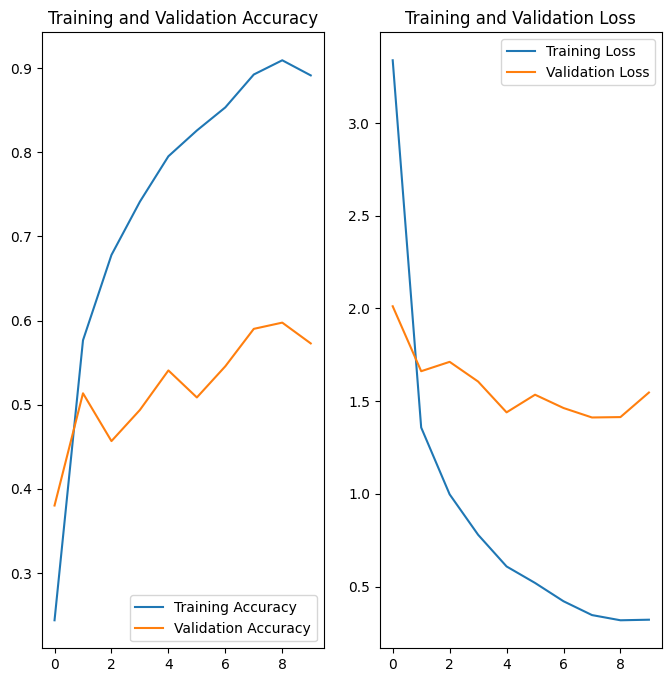

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(num_classes, activation='softmax')(x)
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)
# View the structure of the model
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_8[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [ ]:

validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 405 images belonging to 27 classes.


In [ ]:
# Defining the cost and model optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history4 = model.fit(
    train_generator,#egitim verileri
    steps_per_epoch=None,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True)

Epoch 1/10
30/30 [==============================] - 143s 5s/step - loss: 7.9080 - accuracy: 0.4224 - val_loss: 5.0144 - val_accuracy: 0.5531 - lr: 0.0010
Epoch 2/10
30/30 [==============================] - 131s 4s/step - loss: 1.9704 - accuracy: 0.7592 - val_loss: 4.9571 - val_accuracy: 0.5926 - lr: 0.0010
Epoch 3/10
30/30 [==============================] - 137s 5s/step - loss: 1.0688 - accuracy: 0.8427 - val_loss: 4.4280 - val_accuracy: 0.6025 - lr: 0.0010
Epoch 4/10
30/30 [==============================] - 134s 4s/step - loss: 0.7062 - accuracy: 0.8944 - val_loss: 4.5302 - val_accuracy: 0.6321 - lr: 0.0010
Epoch 5/10
30/30 [==============================] - 133s 4s/step - loss: 0.9637 - accuracy: 0.8775 - val_loss: 4.5181 - val_accuracy: 0.6519 - lr: 0.0010
Epoch 6/10
30/30 [==============================] - 131s 4s/step - loss: 1.0696 - accuracy: 0.8870 - val_loss: 5.2962 - val_accuracy: 0.6247 - lr: 0.0010
Epoch 7/10
30/30 [==============================] - 137s 5s/step - loss: 0.5

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Model/inception.h5')


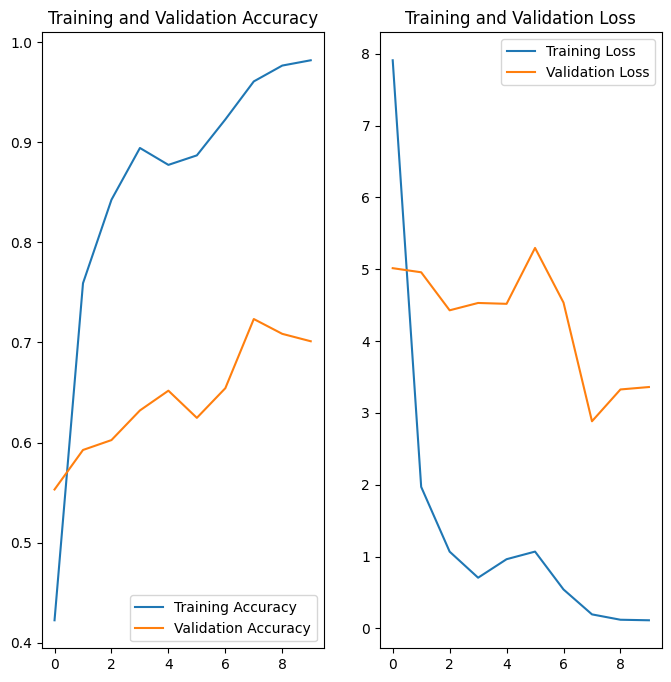

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_inception=load_model('/content/drive/MyDrive/Colab Notebooks/Model/inception.h5')

1/1 [==============================] - 0s 29ms/step
Tomato_Early_blight


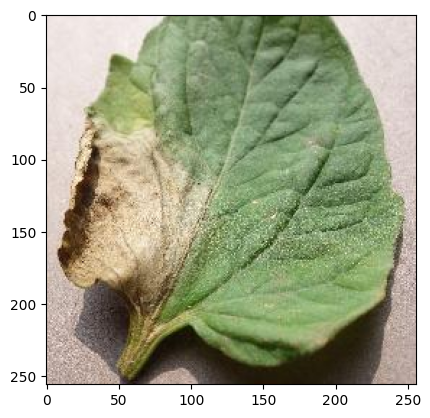

In [ ]:
classes=list(train_generator.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

img_url='/content/drive/MyDrive/Colab Notebooks/dataset-small/val/Tomato_Late_blight/b27c48d1-189e-4187-9535-78dc1c8a803e___RS_Late.B 6789.JPG'
result_inception = model_inception.predict([prepare(img_url)])
disease=image.load_img(img_url)
plt.imshow(disease)

classresult=np.argmax(result_inception,axis=1)
print(classes[classresult[0]])
